In [5]:
import networkx as nx
import matplotlib.pyplot as plt
from node2vec import Node2Vec
from sklearn.manifold import TSNE
import numpy as np


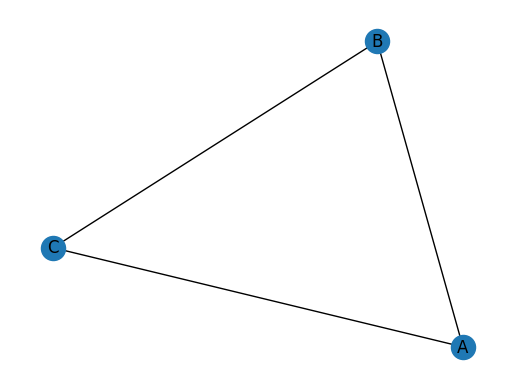

In [2]:
G = nx.Graph()

G.add_node('A')
G.add_nodes_from(['B', 'C'])

G.add_edge('A', 'B')
G.add_edges_from([('B', 'C'), ('A', 'C')])

fig, ax = plt.subplots()
nx.draw_networkx(G)
ax.set_facecolor('white')
ax.axis('off')
fig.set_facecolor('white')

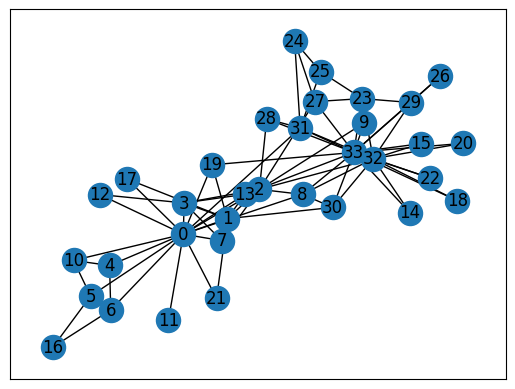

In [6]:
# Zachary's Karate club
G = nx.karate_club_graph()
karate_pos = nx.spring_layout(G, k=0.3)
nx.draw_networkx(G, karate_pos)

#print(list(G.nodes))
#print(list(G.edges))

# The club instructor, Mr. Hi, has node ID "0"
mr_hi = 0 
#print(mr_hi in G) 
#print(G.has_node(mr_hi)) 

# Mr Hi's friends are:
#print(list(G.neighbors(mr_hi)))

# The president of the karate club, nicknamed John A., is represented by ID 33, is not a friend of My Hi.
john_a = 33 
#print((mr_hi, john_a) in G.edges)
#print(G.has_edge(mr_hi, john_a))

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 75.06it/s]


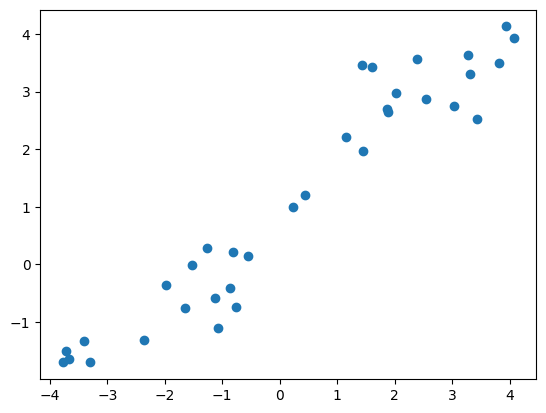

In [7]:
# Create Embedding
node2vec = Node2Vec(G, dimensions=4)

model = node2vec.fit(window=10)

embeddings = np.array([model.wv[x] for x in G.nodes])

# reduce the dimension using t-SNE
tsne = TSNE(n_components=2, random_state=7, perplexity=15)
embeddings_2d = tsne.fit_transform(embeddings)

# visualise the embeddings
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])
plt.show()